# <font color=green>The following shall answer those 5 questions:</font> 

#### <font color=green> 1- Could you show us how the median `close` stock price changed year over year? Use whichever visualization you would fine suitable.</font>

#### <font color=green> 2- How did the volatility of this stock index changed year over year? For the sake of exercise, don't bother with VIX and similar proper volatility indicators - a standard deviation of `close` price will do. What do you see?</font>

#### <font color=green> 3- Which are the top 5 most volatile stocks in a year in that dataset? Group by `date`'s year and `name`, use standard deviation to approximate volatility.</font>

#### <font color=green> 4- Let's zoom in and look at the Google stock in 2015 (`name` is `GOOGL`), again looking at the closing price. Could you show daily, weekly, and monthly dynamics? Weeks should start on Mondays and be labelled by Monday's date.</font>

#### <font color=green> 5- Finally, please, show the closing prices of Google, Amazon (`AMZN`), and Microsoft (`MSFT`) on the same chart, for the whole duration of data. What do you see? </font>

# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
import time
from datetime import date

# Importing dataset

#### Please download and unzip the folder, or download the file directly: https://www.kaggle.com/camnugent/sandp500?select=all_stocks_5yr.csv
#### Then move the csv file to the same file where the notekook is

In [3]:
stock_data=pd.read_csv('all_stocks_5yr_data.csv')

In [83]:
stock_data.head(20)

,date,open,high,low,close,volume,name,year,month,week,day,week_day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,2,6,8,Friday
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,2,7,11,Monday
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,2,7,12,Tuesday
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,2,7,13,Wednesday
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,2,7,14,Thursday
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,2,7,15,Friday
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,2,8,19,Tuesday
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2013,2,8,20,Wednesday
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2013,2,8,21,Thursday
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2013,2,8,22,Friday


# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Cleaning & wrangling

In [5]:
stock_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
stock_data['date']= pd.to_datetime(stock_data['date'], errors='coerce')

In [7]:
stock_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [8]:
stock_data.columns = stock_data.columns.str.lower()

In [9]:
stock_data.head()

,date,open,high,low,close,volume,name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [11]:
stock_data=stock_data.dropna()

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   name    619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [13]:
stock_data['year']=pd.DatetimeIndex(stock_data['date']).year

In [14]:
stock_data.head()

,date,open,high,low,close,volume,name,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013


# <font color=green>----------------------------------------------------------------------------------------------------</font>

# EDA

In [15]:
stock_data.describe()

,open,high,low,close,volume,year
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05,619029.000000
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06,2015.125194
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06,1.445846
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02,2013.000000
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06,2014.000000
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06,2015.000000
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06,2016.000000
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,2018.000000


In [16]:
stock_data.describe(include=[object])

,name
count,619029
unique,505
top,MHK
freq,1259


In [17]:
stock_data["close"].mean()

83.04330497876393

In [18]:
stock_data["close"].std()

97.38891315526988

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='close', ylabel='Density'>

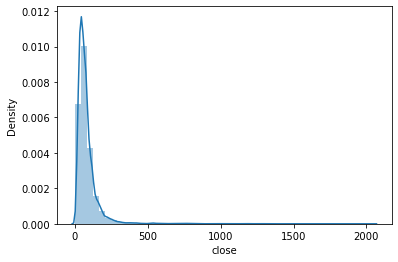

In [19]:
sns.distplot(stock_data['close'])

# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Answering question one: Could you show us how the median `close` stock price changed year over year?

In [20]:
stock_data.groupby('year')['close'].median()

year
2013    51.30
2014    59.46
2015    64.35
2016    64.90
2017    72.37
2018    78.71
Name: close, dtype: float64

#### And here's the visualisation in Matplotlib:

In [21]:
plot_avg_year=stock_data.groupby('year')['close'].median().sort_values()

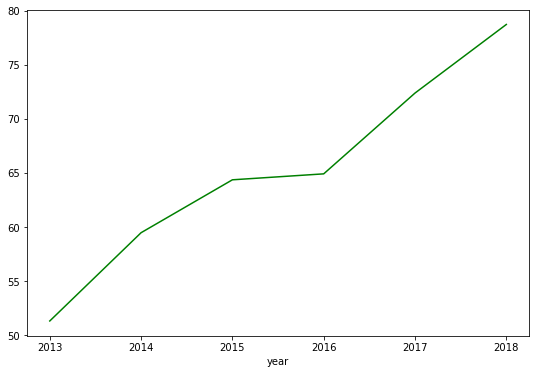

In [130]:
ax=plot_avg_year.plot(x='close', y=['year'], figsize=(9, 6), color='green')

#### But the following is a better visualisation with a confidence interval using Seaborn:

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


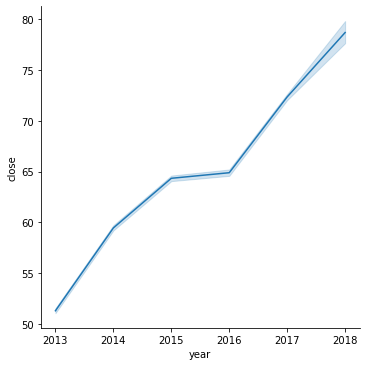

In [132]:
sns.relplot('year', 'close', data=stock_data,kind='line', estimator=np.median)

#### Obviously the median trendline is strong upward

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


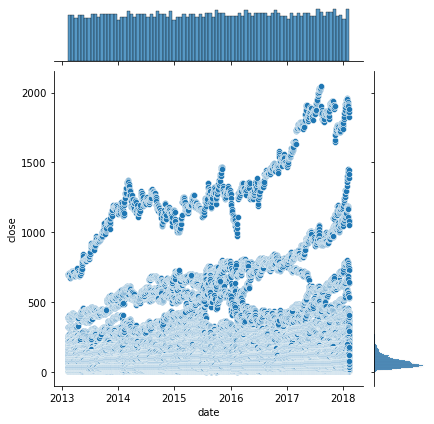

In [127]:
sns.jointplot(stock_data['date'], stock_data['close'], estimator=np.median)

In [24]:
groupby_year = stock_data.groupby('year', axis=0)

In [25]:
groupby_year.mean()

,open,high,low,close,volume
year,,,,,
2013,64.333983,64.913807,63.768605,64.368619,4.573753e+06
2014,76.965995,77.647126,76.267191,76.969836,4.163922e+06
2015,84.133849,84.951007,83.276098,84.131558,4.324119e+06
2016,85.214264,86.057550,84.369887,85.253965,4.556700e+06
2017,98.777123,99.555482,97.981006,98.800548,3.970454e+06
2018,111.250128,112.491921,110.048988,111.287631,4.825638e+06


# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Answering question two: How did the volatility of this stock index changed year over year?

In [26]:
stock_data.groupby('year')['close'].std()

year
2013     62.964690
2014     82.186603
2015     92.836264
2016    100.405493
2017    123.898963
2018    142.193646
Name: close, dtype: float64

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


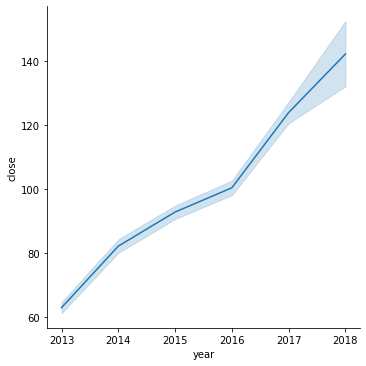

In [128]:
sns.relplot('year', 'close', data=stock_data,kind='line', estimator='std')

#### A strong upward standard deviation trendline has always been higher since 2014 the mean & the median, therefore we can say the increasing volatility in general is evident.

#### The chart below (using Tableau) illustrates it better

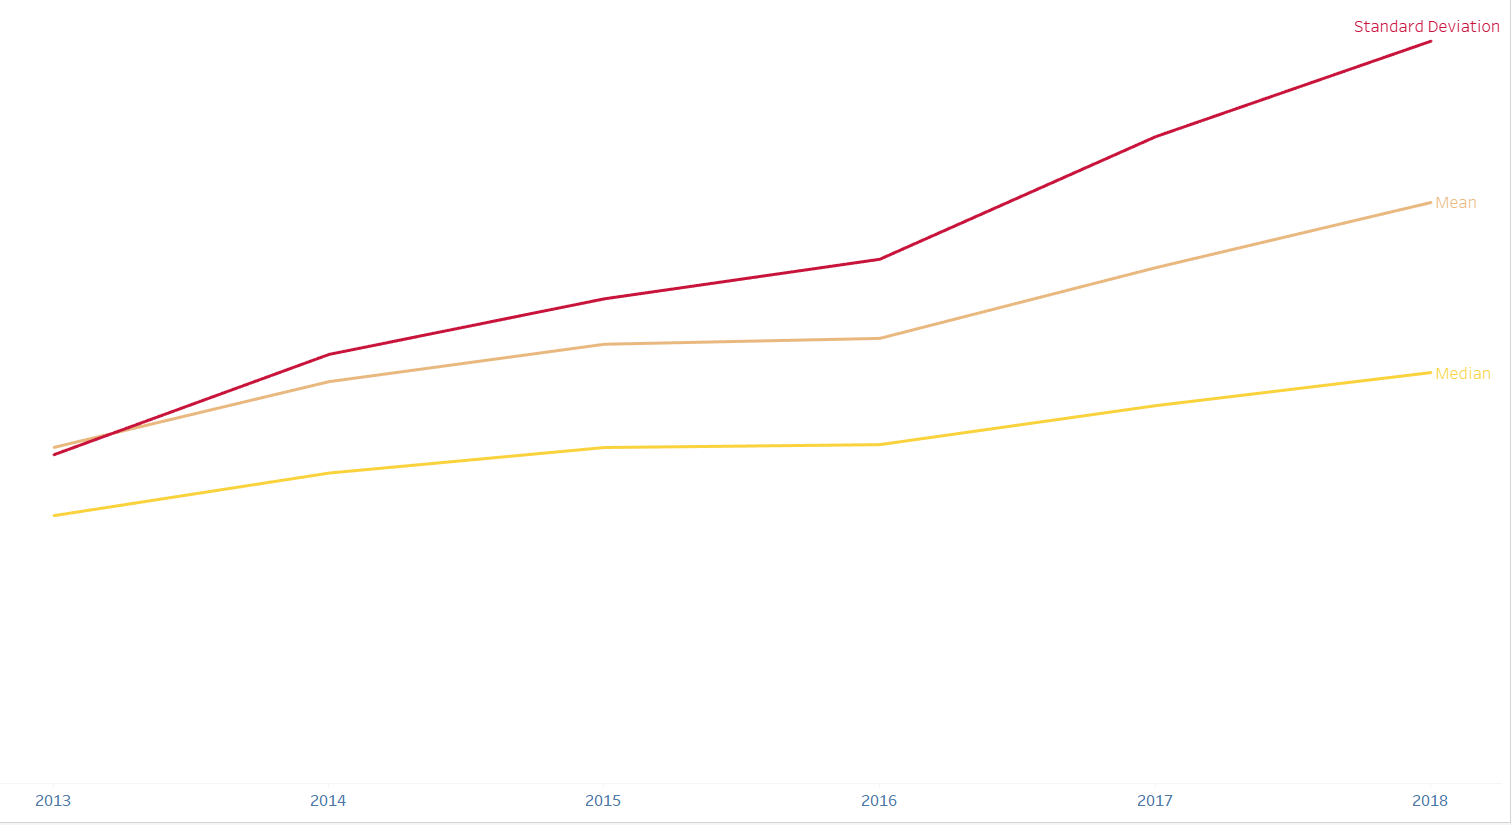

# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Answering question 3: Which are the top 5 most volatile stocks in a year in that dataset?

In [29]:
top=stock_data.groupby(['year', 'name'])['close'].std()

In [30]:
top

year  name
2013  A       4.586794
      AAL     3.281442
      AAP     9.470546
      AAPL    6.514463
      ABBV    4.022812
                ...   
2018  XYL     1.992867
      YUM     1.790431
      ZBH     1.974638
      ZION    1.327261
      ZTS     2.343205
Name: close, Length: 2975, dtype: float64

#### Cleaning the name field

In [31]:
def clean_name(x):
    if x in ['GOOGL', 'GOOG']:
        return 'GGL'
    else: 
        return x

In [32]:
stock_data['name']=list(map(clean_name,stock_data['name']))

In [33]:
stock_data.query('name=="GGL"')

,date,open,high,low,close,volume,name,year
250308,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GGL,2013
250309,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GGL,2013
250310,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GGL,2013
250311,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GGL,2013
250312,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GGL,2013
...,...,...,...,...,...,...,...,...
252537,2018-02-01,1162.6100,1174.0000,1157.5200,1167.7000,2412114,GGL,2018
252538,2018-02-02,1122.0000,1123.0700,1107.2800,1111.9000,4857943,GGL,2018
252539,2018-02-05,1090.6000,1110.0000,1052.0300,1055.8000,3798301,GGL,2018
252540,2018-02-06,1027.1800,1081.7100,1023.1400,1080.6000,3447956,GGL,2018


In [34]:
top

year  name
2013  A       4.586794
      AAL     3.281442
      AAP     9.470546
      AAPL    6.514463
      ABBV    4.022812
                ...   
2018  XYL     1.992867
      YUM     1.790431
      ZBH     1.974638
      ZION    1.327261
      ZTS     2.343205
Name: close, Length: 2975, dtype: float64

### Using SQL for the rest of the querying

In [114]:
conda install pandasql

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\toshiba\anaconda3

  added / updated specs:
    - pandasql


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       haa95532_1         113 KB
    openssl-1.1.1l             |       h2bbff1b_0         4.8 MB
    pandasql-0.7.3             |   py38haa95532_1         319 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

  pandasql           pkgs/main/win-64::pandasql-0.7.3-py38haa95532_1

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.5.3~ --> pkgs/main::ca-certificates-2021.7.5-haa95532_1
  openssl            conda-forge::openssl-1.1.1k-h8ffe710_0 --> pkgs/main::openssl-1.1.1l-h2bbff1b_0

The 

In [64]:
from pandasql import sqldf

In [65]:

print(sqldf("SELECT * FROM stock_data;", locals()))

                              date   open   high    low  close    volume name  \
0       2013-02-08 00:00:00.000000  15.07  15.12  14.63  14.75   8407500  AAL   
1       2013-02-11 00:00:00.000000  14.89  15.01  14.26  14.46   8882000  AAL   
2       2013-02-12 00:00:00.000000  14.45  14.51  14.10  14.27   8126000  AAL   
3       2013-02-13 00:00:00.000000  14.30  14.94  14.25  14.66  10259500  AAL   
4       2013-02-14 00:00:00.000000  14.94  14.96  13.16  13.99  31879900  AAL   
...                            ...    ...    ...    ...    ...       ...  ...   
619024  2018-02-01 00:00:00.000000  76.84  78.27  76.69  77.82   2982259  ZTS   
619025  2018-02-02 00:00:00.000000  77.53  78.12  76.73  76.78   2595187  ZTS   
619026  2018-02-05 00:00:00.000000  76.64  76.92  73.18  73.83   2962031  ZTS   
619027  2018-02-06 00:00:00.000000  72.74  74.56  72.13  73.27   4924323  ZTS   
619028  2018-02-07 00:00:00.000000  72.70  75.00  72.69  73.86   4534912  ZTS   

        year  
0       2013

In [66]:
q='''WITH cte AS (
   SELECT year, name, close,
          row_number() OVER (PARTITION BY year ORDER BY close desc) rn
   FROM top
)
SELECT year, name, close, rn
FROM cte
WHERE rn <= 5;'''
print(sqldf(q, locals()))

    year   name       close  rn
0   2013   PCLN  164.155212   1
1   2013    CMG   72.897361   2
2   2013  GOOGL   45.258563   3
3   2013   REGN   43.840440   4
4   2013   AMZN   42.935227   5
5   2014   PCLN   67.652941   1
6   2014    CMG   62.017193   2
7   2014   REGN   43.379578   3
8   2014    AZO   28.621552   4
9   2014   AMZN   27.665268   5
10  2015   AMZN  110.745100   1
11  2015   PCLN   94.932552   2
12  2015  GOOGL   87.191521   3
13  2015   GOOG   81.363737   4
14  2015    CMG   60.936972   5
15  2016   PCLN  128.768219   1
16  2016   AMZN   92.362312   2
17  2016    CMG   38.276631   3
18  2016  GOOGL   37.403746   4
19  2016    MTD   37.086392   5
20  2017   PCLN  121.479972   1
21  2017   AMZN  106.576374   2
22  2017    AZO   84.039662   3
23  2017   GOOG   77.232992   4
24  2017  GOOGL   75.367676   5
25  2018   AMZN   81.872832   1
26  2018   PCLN   50.134806   2
27  2018  GOOGL   40.948108   3
28  2018   GOOG   39.489601   4
29  2018   NFLX   28.141321   5


In [67]:
q='''SELECT DISTINCT name from top order by close DESC limit 5;'''
print(sqldf(q, locals()))

    name
0   PCLN
1    CMG
2  GOOGL
3   REGN
4   AMZN


##### The answer to question 3:
PCLN,
AMZN,
GGL,
AZO,
MTD

# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Answering question 4: Let's zoom in and look at the Google stock in 2015 (`name` is `GOOGL`), again looking at the closing price. 
# Could you show daily, weekly, and monthly dynamics? Weeks should start on Mondays and be labelled by Monday's date.

#### Please note that I've already cleaned 'GOOGL' and 'GOOG' into 'GGL' while answering question 3. You can find the code above.

#### Also, I've changed the 'date' column data type into datetime while the cleaning process above.

#### Now, first I'm going to extract month, week, day and weed day columns for easier visualisation.

In [36]:
stock_data['month']=pd.DatetimeIndex(stock_data['date']).month

In [37]:
stock_data['week']=pd.DatetimeIndex(stock_data['date']).week

<ipython-input-37-d52ee9ffebf9>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_data['week']=pd.DatetimeIndex(stock_data['date']).week


In [38]:
stock_data.head()

,date,open,high,low,close,volume,name,year,month,week
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,2,6
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,2,7
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,2,7
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,2,7
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,2,7


In [39]:
stock_data['day']=pd.DatetimeIndex(stock_data['date']).day

In [80]:
stock_data.head(20)

,date,open,high,low,close,volume,name,year,month,week,day,week_day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,2,6,8,Friday
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,2,7,11,Monday
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,2,7,12,Tuesday
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,2,7,13,Wednesday
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,2,7,14,Thursday
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,2,7,15,Friday
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,2,8,19,Tuesday
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2013,2,8,20,Wednesday
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2013,2,8,21,Thursday
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2013,2,8,22,Friday


In [68]:
stock_data['week_day'] = stock_data['date'].dt.day_name()

In [69]:
stock_data.head()

,date,open,high,low,close,volume,name,year,month,week,day,week_day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,2,6,8,Friday
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,2,7,11,Monday
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,2,7,12,Tuesday
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,2,7,13,Wednesday
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,2,7,14,Thursday


In [70]:
stock_data.query('week==9')

,date,open,high,low,close,volume,name,year,month,week,day,week_day
10,2013-02-25,13.60,13.7600,13.00,13.02,7186400,AAL,2013,2,9,25,Monday
11,2013-02-26,13.14,13.4200,12.70,13.26,9419000,AAL,2013,2,9,26,Tuesday
12,2013-02-27,13.28,13.6200,13.18,13.41,7390500,AAL,2013,2,9,27,Wednesday
13,2013-02-28,13.49,13.6300,13.39,13.43,6143600,AAL,2013,2,9,28,Thursday
14,2013-03-01,13.37,13.9500,13.32,13.61,7376800,AAL,2013,3,9,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
618800,2017-02-27,53.85,54.1800,53.55,53.83,4220561,ZTS,2017,2,9,27,Monday
618801,2017-02-28,53.46,53.9650,53.24,53.31,4106339,ZTS,2017,2,9,28,Tuesday
618802,2017-03-01,53.73,54.0800,53.55,53.89,3581081,ZTS,2017,3,9,1,Wednesday
618803,2017-03-02,54.00,54.0800,53.31,53.37,3299974,ZTS,2017,3,9,2,Thursday


In [71]:
ggl_2015=stock_data.query('year==2015') 

In [72]:
ggl_2015.head()

,date,open,high,low,close,volume,name,year,month,week,day,week_day
478,2015-01-02,54.28,54.60,53.07,53.910,10756705,AAL,2015,1,1,2,Friday
479,2015-01-05,54.37,54.54,53.34,53.875,11565004,AAL,2015,1,2,5,Monday
480,2015-01-06,54.27,54.43,52.13,53.040,13772171,AAL,2015,1,2,6,Tuesday
481,2015-01-07,53.38,53.65,52.12,53.010,10069816,AAL,2015,1,2,7,Wednesday
482,2015-01-08,53.48,54.28,53.25,53.660,9672064,AAL,2015,1,2,8,Thursday


In [73]:
ggl_2015_filtered=ggl_2015.query('name=="GGL"') 

In [74]:
ggl_2015_filtered.head()

,date,open,high,low,close,volume,name,year,month,week,day,week_day
250786,2015-01-02,532.60,535.8000,527.88,529.55,1327870,GGL,2015,1,1,2,Friday
250787,2015-01-05,527.15,527.9899,517.75,519.46,2059119,GGL,2015,1,2,5,Monday
250788,2015-01-06,520.50,521.2100,505.55,506.64,2731813,GGL,2015,1,2,6,Tuesday
250789,2015-01-07,510.95,511.4900,503.65,505.15,2345875,GGL,2015,1,2,7,Wednesday
250790,2015-01-08,501.51,507.5000,495.02,506.91,3662224,GGL,2015,1,2,8,Thursday


#### And now let's a look at some visualisation of month, week, day and weed day dynamics, with the standard deviation as the confidence interval:

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


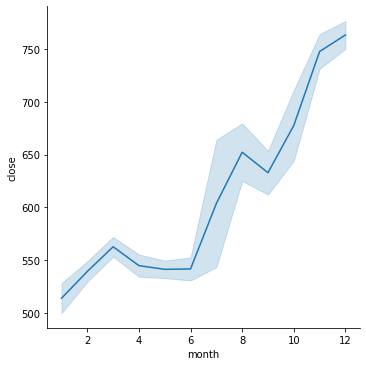

In [108]:
sns.relplot('month', 'close', data=ggl_2015_filtered,kind='line', ci='sd')

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


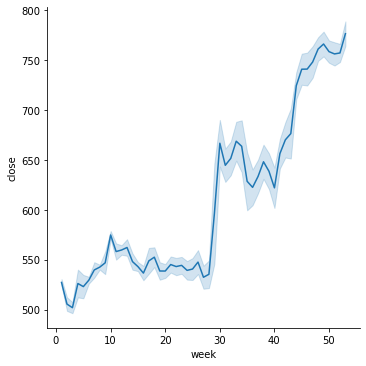

In [106]:
sns.relplot('week', 'close', data=ggl_2015_filtered,kind='line', ci='sd')

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


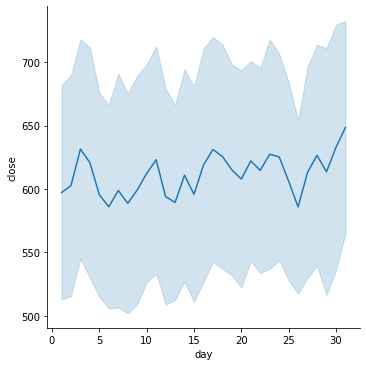

In [95]:
sns.relplot('day', 'close', data=ggl_2015_filtered,kind='line', ci='sd')

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


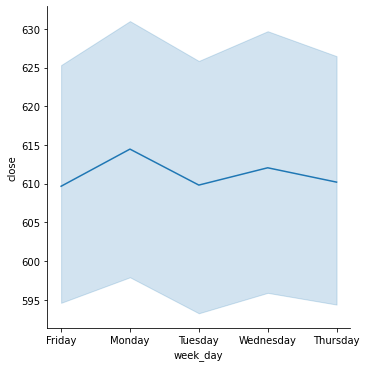

In [185]:
sns.relplot('week_day', 'close', data=ggl_2015_filtered,kind='line')

#### Please note that dispite the chart above, Monady is always the begging of the week in the data frame as can be queried above.

In [88]:
stock_data.loc[stock_data['date'].dt.week==12]

<ipython-input-88-9053be16bfc4>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  stock_data.loc[stock_data['date'].dt.week==12]


,date,open,high,low,close,volume,name,year,month,week,day,week_day
25,2013-03-18,15.80,16.330,15.710,16.29,6514100,AAL,2013,3,12,18,Monday
26,2013-03-19,16.48,16.850,16.410,16.78,11805300,AAL,2013,3,12,19,Tuesday
27,2013-03-20,17.13,17.330,16.870,17.23,10819800,AAL,2013,3,12,20,Wednesday
28,2013-03-21,17.21,17.430,16.870,17.00,10740800,AAL,2013,3,12,21,Thursday
29,2013-03-22,17.10,17.290,16.770,16.86,8545200,AAL,2013,3,12,22,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
618815,2017-03-20,54.04,54.450,53.830,54.28,2180574,ZTS,2017,3,12,20,Monday
618816,2017-03-21,54.47,54.790,53.240,53.39,3008336,ZTS,2017,3,12,21,Tuesday
618817,2017-03-22,53.40,53.945,53.240,53.87,3276789,ZTS,2017,3,12,22,Wednesday
618818,2017-03-23,53.89,54.190,53.595,53.80,3015617,ZTS,2017,3,12,23,Thursday


#### Further exploration of Google stock in 2015 using boxplot & histogram:

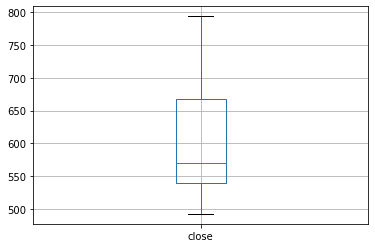

In [49]:
ggl_2015_filtered[['close']].boxplot()
plt.show()

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='close', ylabel='Density'>

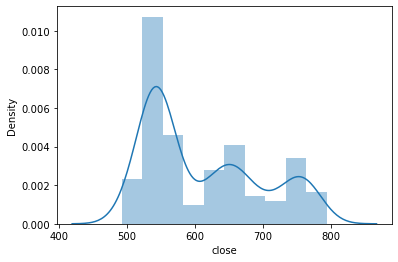

In [55]:
sns.distplot(ggl_2015_filtered['close'])

# <font color=green>----------------------------------------------------------------------------------------------------</font>

# Answering question 5: Finally, please, show the closing prices of Google, Amazon (`AMZN`), and Microsoft (`MSFT`) on the same chart, for the whole duration of data. What do you see?

In [167]:
ggl_amzn_msft=stock_data.query('name== ["GGL", "AMZN", "MSFT"]')

In [168]:
ggl_amzn_msft.head()

,date,open,high,low,close,volume,name,year,month,week,day,week_day
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013,2,6,8,Friday
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013,2,7,11,Monday
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013,2,7,12,Tuesday
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013,2,7,13,Wednesday
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013,2,7,14,Thursday


#### Cleaning; changing names into more understandable version

In [180]:
def clean_name(y):
    if y in ['AMZN']:
        return 'Amazon'
    elif y in ['GGL']:
        return 'Google'
    elif y in ['MSFT']:
        return 'Microsoft'
    else:
        return y

In [181]:
ggl_amzn_msft['name']=list(map(clean_name,ggl_amzn_msft['name']))

<ipython-input-181-ff09885c16db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggl_amzn_msft['name']=list(map(clean_name,ggl_amzn_msft['name']))


In [182]:
ggl_amzn_msft.head()

,date,open,high,low,close,volume,name,year,month,week,day,week_day
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,Amazon,2013,2,6,8,Friday
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,Amazon,2013,2,7,11,Monday
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,Amazon,2013,2,7,12,Tuesday
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,Amazon,2013,2,7,13,Wednesday
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,Amazon,2013,2,7,14,Thursday


#### Let's have a look at the distribution of close prices for those three

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='close', ylabel='Density'>

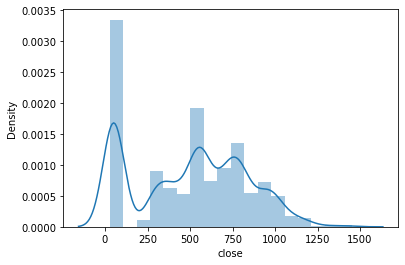

In [52]:
sns.distplot( ggl_amzn_msft['close'])

#### And now the overall median for each of them

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='close'>

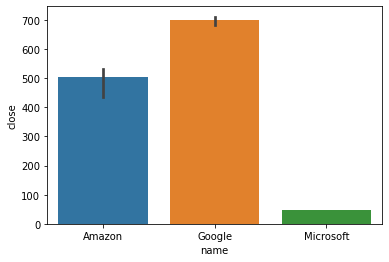

In [183]:
sns.barplot(ggl_amzn_msft['name'], ggl_amzn_msft['close'], estimator=np.median)

#### Overall median over the years stacked:

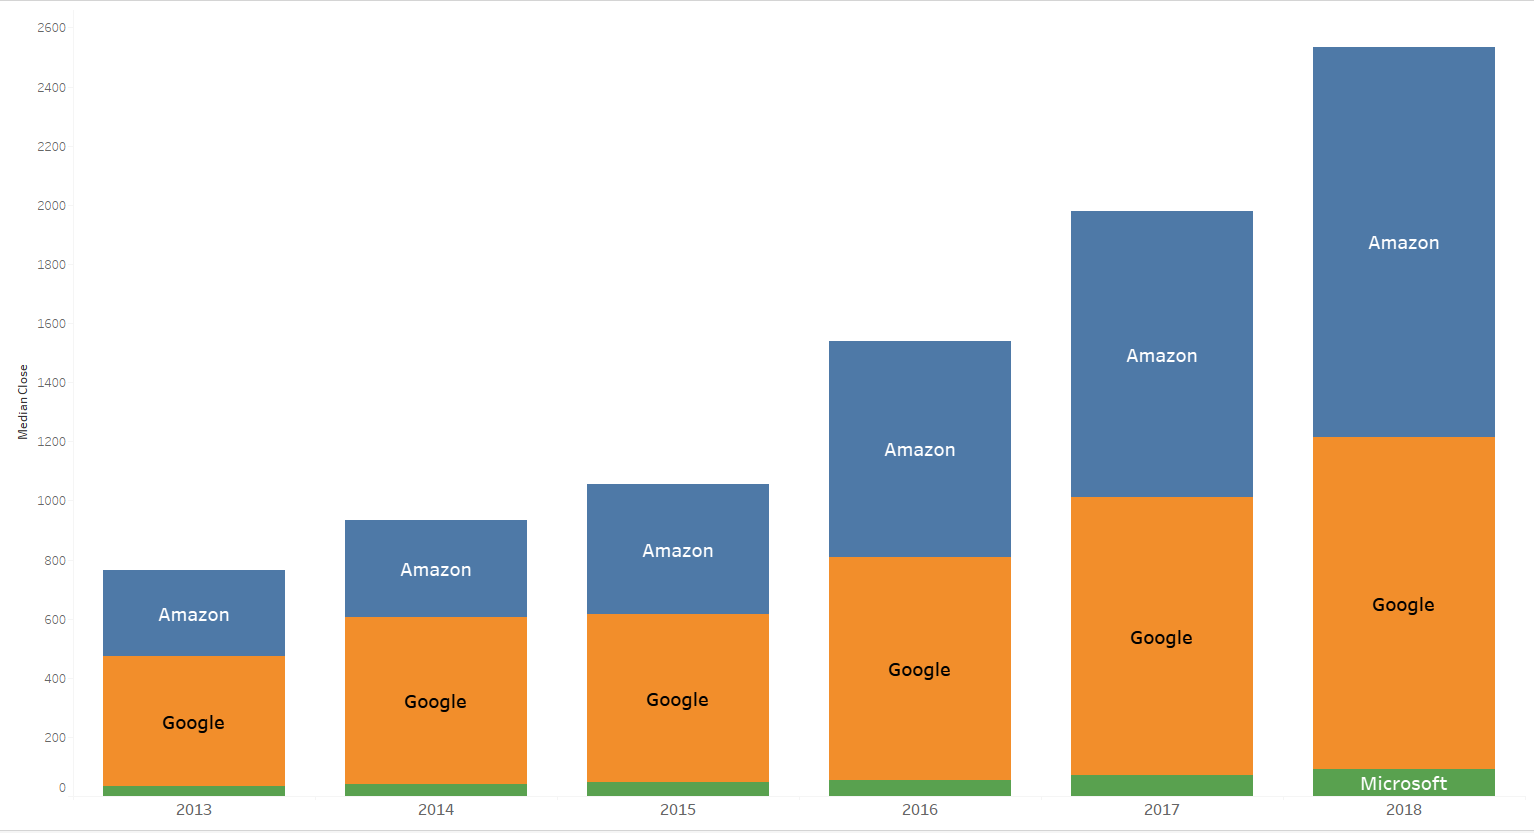

#### The order of Google, Amazon & Microsoft is clear regarding the over all of close prices, with Microsoft lagging signeficantly behind the other two. However the case differs a bit when it comes to volatility and median over time as the charts below show

#### The median with Standard deviation as confidence interval:

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


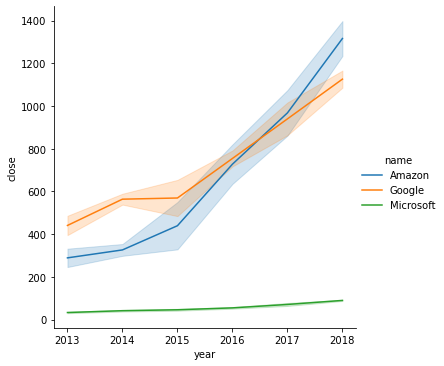

In [184]:
sns.relplot('year', 'close', data=ggl_amzn_msft,kind='line', estimator='median', hue='name', ci='sd')

#### Standard Deviation timeline with a trend line:

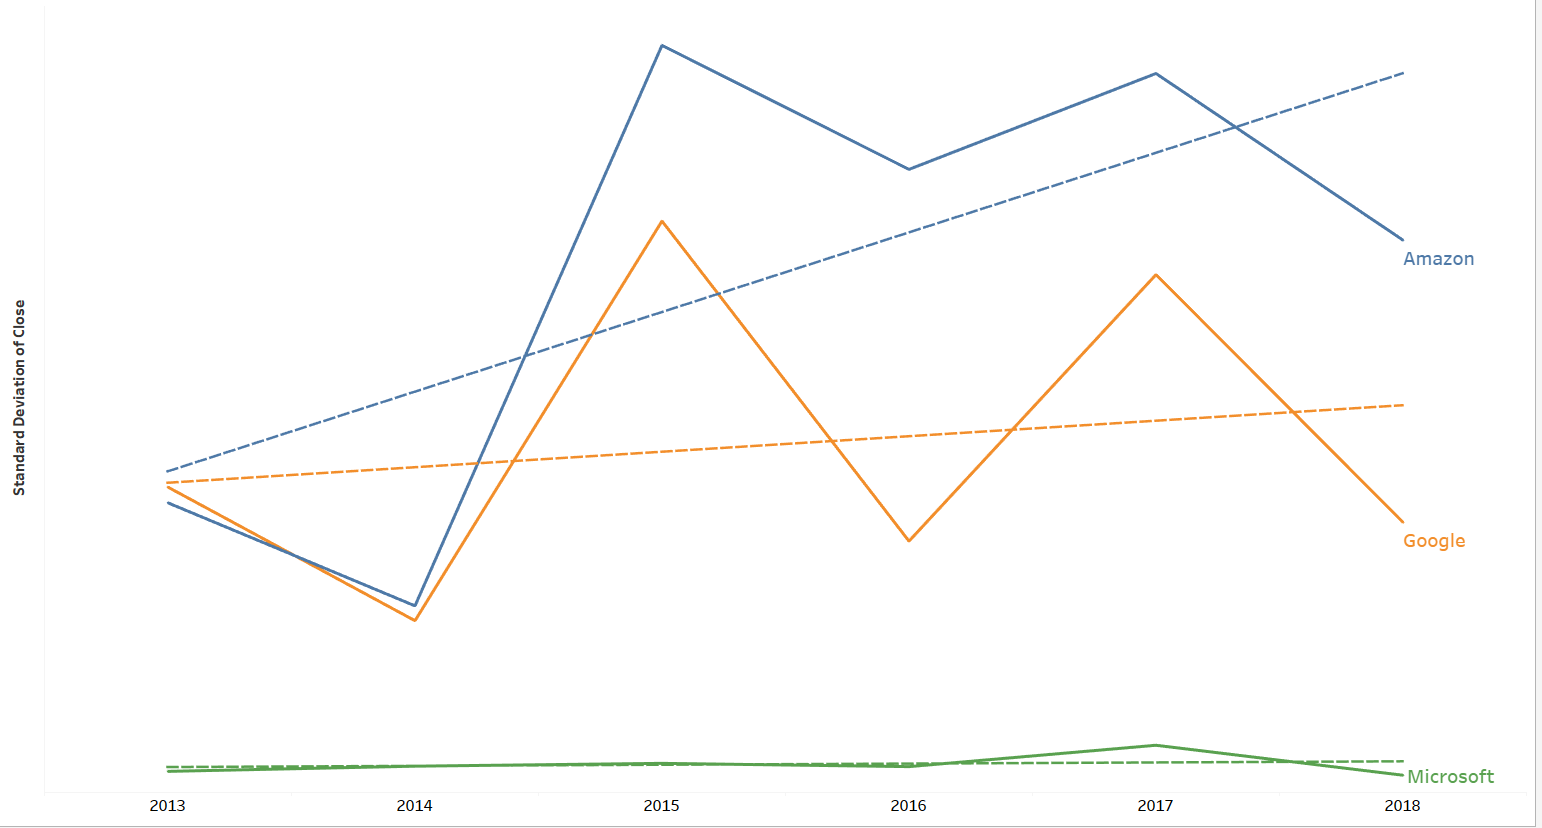

### <font color=blue>Median-wise</font>, we can see that google ranks number one for the whole period from 2013-2018. But Amazon has taken over that rank in mid 2016 rising.
### Microsoft maintain steady #3 rank with a small increase since 2017.

### <font color=blue>Volatility-wise</font>, it's the opposite; Microsoft seems to be the least volatile, while Google ranks #2 with an almost horizontal trend line.
### Amazon comes third with an upward trend line and higher Standard Deviation since 2014.

# <font color=green>----------------------------------------------------------------------------------------------------</font>

#### <font color=green>I hope you enjoyed it. Thanks for your attention.</font>